In [23]:
import butterpy as bp
import matplotlib.pyplot as plt
import numpy as np

from astropy.timeseries import LombScargle

bp.__version__

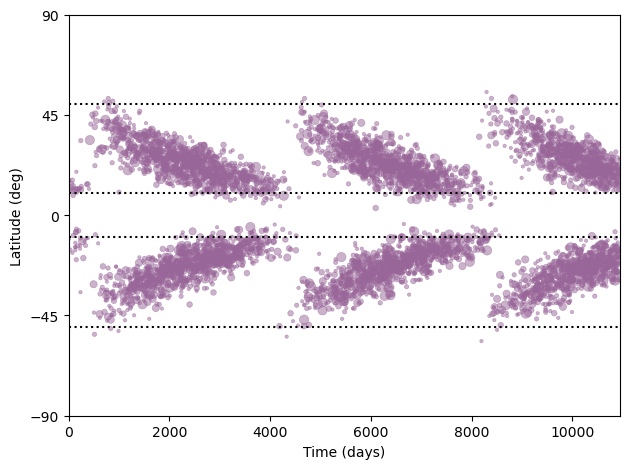

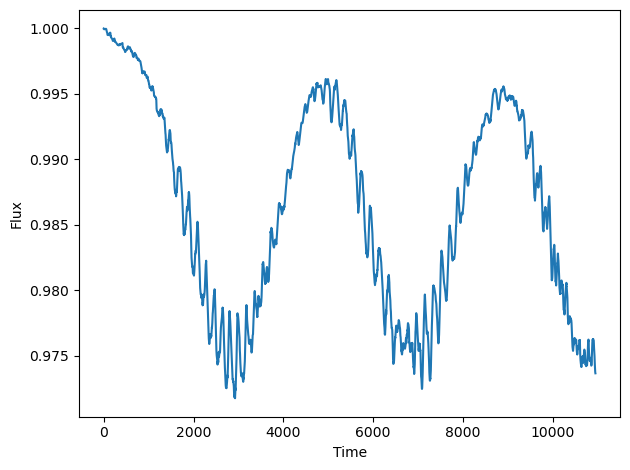

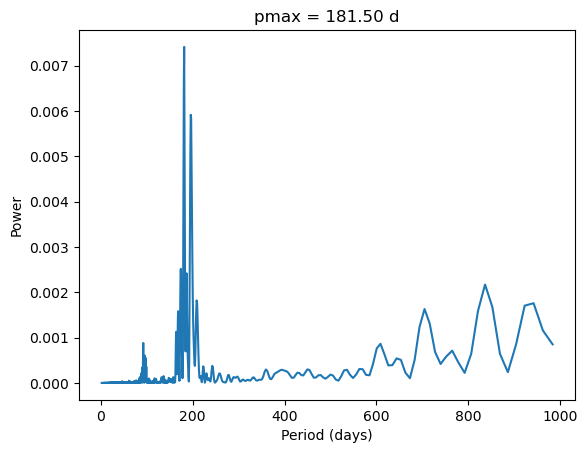

In [28]:
duration = 30*365
min_lat = 10
max_lat = 50

def benchmark_test(vary_emergence, butterfly):    
    np.random.seed(42)
    
    s = bp.Surface()
    
    regions = s.emerge_regions(
        ndays=duration,
        activity_level=1,
        min_lat=min_lat,
        max_lat=max_lat,
        cycle_period=11,
        cycle_overlap=2,
        vary_emergence=vary_emergence,
        butterfly=butterfly,
    )
    
    time = np.arange(0, duration, 1)
    
    lc = s.evolve_spots(
        inclination=80,
        period=179.9,
        shear=0.2,
        time=time,
    )

    return s

s = benchmark_test(
    vary_emergence=True,
    butterfly=True,
)

s.plot_butterfly()
plt.tight_layout()
plt.hlines([min_lat, max_lat, -min_lat, -max_lat], xmin=0, xmax=duration, color="k", linestyle=":")

s.plot_lightcurve()
plt.tight_layout()


mask = s.time > 2000
ls = LombScargle(s.time[mask], s.flux[mask])
freq, power = ls.autopower()

mask = (1/freq >= 2) & (1/freq < 1000)
periods = 1/freq[mask]
power = power[mask]

pmax = periods[power.argmax()]
plt.figure()
plt.title(f"{pmax = :.2f} d")
plt.xlabel("Period (days)")
plt.ylabel("Power")
plt.plot(periods, power)

In [16]:
%%timeit
s = benchmark_test(
    vary_emergence=True,
    butterfly=True,
)
# 5743 spots
# 2.15 s ± 8.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

2.2 s ± 14.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%%timeit
s = benchmark_test(
    vary_emergence=True,
    butterfly=False,
)
# 5777 spots
# 2.17 s ± 13.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

2.26 s ± 20.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%%timeit
s = benchmark_test(
    vary_emergence=False,
    butterfly=True,
)
# 11339 spots
# 3.36 s ± 29.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

3.48 s ± 17.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
%%timeit
s = benchmark_test(
    vary_emergence=False,
    butterfly=False,
)
# 9425 spots
# 2.81 s ± 12.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

2.94 s ± 27.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
for i in [True, False]:
    for j in [True, False]:
        s = benchmark_test(i, j)
        print(len(s.regions))

5743
5777
11339
9425
